In [1]:
from utils import split_data

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.9)
x_train, y_train, x_test, y_test = splitter.split()

/home/paperspace/hydraNet/HydraMethod/utils.py:88: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(test_size + train_size <= 1.0,
/home/paperspace/hydraNet/HydraMethod/utils.py:236: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(validation_split + test_split + train_size <= 1.0,
/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [3]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [4]:
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

In [5]:
from HydraMethod import HydraMethod

In [6]:
one_head_hydra = HydraMethod(ResnetRnnDense, 1);one_head_hydra.compile()

In [7]:
from utils import LRFinder

In [8]:

lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 512, 3,fit=True)

/home/paperspace/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
972394/972394 [==============================] - 87s 89us/step - loss: 0.6215
Epoch 2/3
684544/972394 [====================>.........] - ETA: 23s - loss: 0.3324

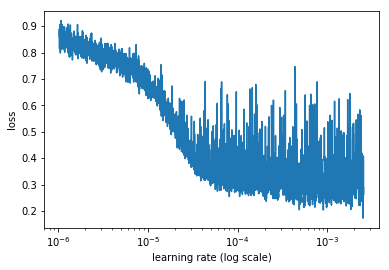

In [9]:
lr_finder.plot_loss()

In [10]:
one_head_hydra.compile(learning_rate=5e-4)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=512, epochs=10)

/home/paperspace/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 972394 samples, validate on 106575 samples
Epoch 1/10
972394/972394 [==============================] - 84s 87us/step - loss: 0.2060 - val_loss: 0.1299
Epoch 2/10
972394/972394 [==============================] - 79s 82us/step - loss: 0.1486 - val_loss: 0.1066
Epoch 3/10
972394/972394 [==============================] - 80s 82us/step - loss: 0.1300 - val_loss: 0.1134
Epoch 4/10
972394/972394 [==============================] - 80s 82us/step - loss: 0.1201 - val_loss: 0.1173
Epoch 5/10
972394/972394 [==============================] - 79s 82us/step - loss: 0.1138 - val_loss: 0.1001
Epoch 6/10
972394/972394 [==============================] - 80s 82us/step - loss: 0.1091 - val_loss: 0.0857
Epoch 7/10
972394/972394 [==============================] - 80s 82us/step - loss: 0.1041 - val_loss: 0.1008
Epoch 8/10
972394/972394 [==============================] - 79s 82us/step - loss: 0.1003 - val_loss: 0.0962
Epoch 9/10
972394/972394 [==============================] - 80s 82us/step - loss: 0.

In [11]:
two_head_hydra = HydraMethod(ResnetRnnDense, 2);two_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 512, 3,fit=True)

/home/paperspace/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
972394/972394 [==============================] - 173s 178us/step - loss: 0.6331
Epoch 2/3
 41984/972394 [>.............................] - ETA: 2:34 - loss: 0.3308

In [ ]:
lr_finder.plot_loss()

In [ ]:
two_head_hydra.compile(learning_rate=5e-4)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, , epochs=10)

In [ ]:
three_head_hydra = HydraMethod(ResnetRnnDense, 3);three_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
three_head_hydra.compile(learning_rate=5e-4)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=64, epochs=10)

In [ ]:
four_head_hydra = HydraMethod(ResnetRnnDense, 4);four_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
four_head_hydra.compile(learning_rate=5e-4)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=64, epochs=10)